In [11]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import os
import glob
import datetime as dt
from salishsea_tools import viz_tools
from matplotlib.ticker import FormatStrFormatter
import cmocean
from salishsea_tools import viz_tools, evaltools as et
from salishsea_tools import visualisations
import NorthNut as nn
import matplotlib.gridspec as gridspec
import pickle
import matplotlib as mpl
import matplotlib.patheffects as path_effects
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal
import matplotlib.gridspec as gridspec
import gsw
fs=8 # fs=8
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = ','.join(r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 '''.split()))
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
%matplotlib inline

In [4]:
start=dt.datetime(2015,8,1) # make sure start and end are consistent between hindcast and GLS files
end=dt.datetime(2015,8,31) # end quickly for now- calculations too long
mod_basedir='/data/eolson/results/MEOPAR/SS36runs/linkHC201812/'
mod_basedir_GLS='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/GLS_Summer15/'
mod_nam_fmt='nowcast'
mod_nam_fmt_GLS='long'
mod_flen=1
mod_flen_GLS=10
saveloc='/data/eolson/results/MEOPAR/SS36runs/calcFiles/NTransport/'
fver='HC201812'

In [5]:
ig0=nn.ig0
ig1=nn.ig1
jg0=nn.jg0
jg1=nn.jg1
tmaskDIAN=nn.tmask
umaskDIAN=nn.umask
vmaskDIAN=nn.vmask

In [10]:
fV=nc.Dataset('/data/eolson/results/MEOPAR/SS36runs/linkHC201812/01jul15/SalishSea_1h_20150701_20150701_grid_V.nc')
fT=nc.Dataset('/data/eolson/results/MEOPAR/SS36runs/linkHC201812/01jul15/SalishSea_1h_20150701_20150701_grid_T.nc')

In [23]:
mesh=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc')
#bathyf=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
depthT = mesh.variables['gdept_0'][0, ...]
depthU = mesh.variables['gdepu'][0, ...]
depthV = mesh.variables['gdepv'][0, ...]
depthW = mesh.variables['gdepw_0'][0, ...]
e1t=mesh.variables['e1t'][0,...]
e2t=mesh.variables['e2t'][0,...]
mbathyT=mesh.variables['mbathy'][0,...]
mbathyU=np.sum(mesh.variables['umask'][0,:,:,:],0)
mbathyV=np.sum(mesh.variables['vmask'][0,:,:,:],0)
tmask=mesh.variables['tmask'][0,:,:,:]
umask=mesh.variables['umask'][0,:,:,:]
vmask=mesh.variables['vmask'][0,:,:,:]
fmask=mesh.variables['fmask'][0,:,:,:]
e1f=np.copy(mesh.variables['e1f'][0,jg0:jg1,ig0:ig1])
e2f=np.copy(mesh.variables['e2f'][0,jg0:jg1,ig0:ig1])
e3t_0=np.copy(mesh.variables['e3t_0'][0,:,:,:])
e3w_0=np.copy(mesh.variables['e3w_0'][0,:,:,:])
tmaska=mesh.variables['tmask'][:,:,jg0:jg1,ig0:ig1]

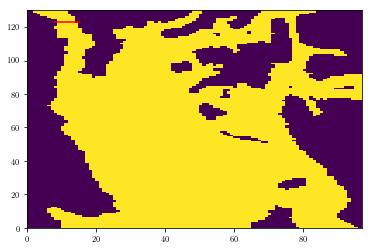

In [88]:
plt.pcolormesh(tmaskDIAN[0,:,:])
plt.plot((8,15),(123,123),'r-')

3.640423

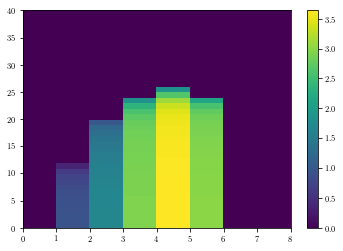

In [90]:
plt.pcolormesh(np.max(np.abs(fV.variables['vomecrty'][:,:,jg0+100,(ig0+10):(ig0+18)]),0))
plt.colorbar()
np.max(np.max(np.max(np.abs(fV.variables['vomecrty'][:,:,jg0+100,(ig0+10):(ig0+18)]),0)))

(-100, 0)

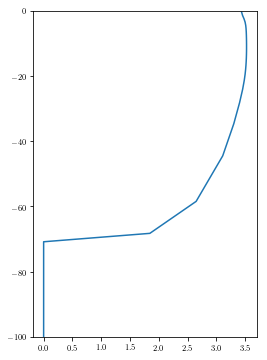

In [36]:
fig,ax=plt.subplots(1,1,figsize=(4,6))
ax.plot(np.max(fV.variables['vomecrty'][:,:,jg0+100,ig0+14],0),-1*depthV[:,jg0+100,ig0+14])
ax.set_ylim(-100,0)

In [38]:
SA=fT.variables['vosaline'][:,:,jg0+100,ig0+14]
CT=fT.variables['votemper'][:,:,jg0+100,ig0+14]
rho=gsw.density.rho(SA,CT,70*np.ones(np.shape(SA)))


In [105]:
CT2=np.copy(CT)
CT2[:,0]=CT[:,0]+5
rho2=gsw.density.rho(SA,CT2,70*np.ones(np.shape(SA)))

1022.2146263626064

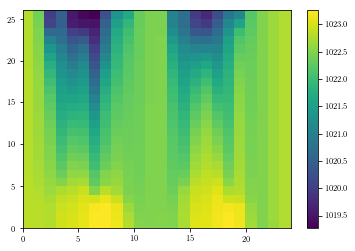

In [106]:
plt.pcolormesh(np.flipud(np.transpose(rho[:,:26])))
plt.colorbar()
np.mean(rho[:,:26])

masked_array(data=[11.502548 , 12.065757 , 15.1470785, 14.290495 ,
                   15.638288 , 15.932125 , 16.203033 , 15.136778 ,
                   13.208365 , 12.564472 , 11.73221  , 11.627055 ,
                   11.632663 , 13.443609 , 13.900567 , 15.09379  ,
                   15.477892 , 14.948895 , 13.952021 , 13.2486725,
                   11.893248 , 11.469323 , 11.547125 , 11.471854 ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

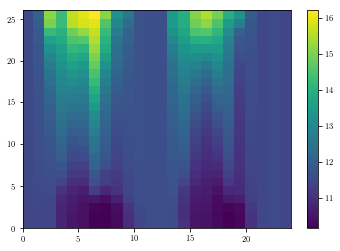

In [110]:
plt.pcolormesh(np.flipud(np.transpose(fT.variables['votemper'][:,:26,jg0+100,ig0+14])))
plt.colorbar()
fT.variables['votemper'][:,0,jg0+100,ig0+14]

(-3.9602287479181086, -5.131453037956021)

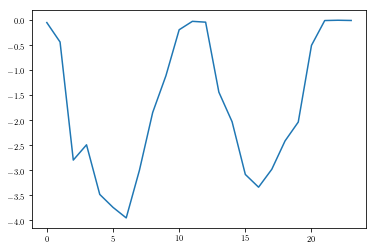

In [107]:
plt.plot(rho[:,0]-rho[:,25])
np.min(rho[:,0]-rho[:,25]),np.min(rho2[:,0]-rho[:,25])

In [62]:
np.sum(tmask[:,jg0+100,ig0+14])

26

In [68]:
np.sum(e3t_0[:26,jg0+100,ig0+14])

69.46838995464037

In [99]:
(3.65-3.26)/3.65

0.10684931506849318

In [100]:
.2/3

0.06666666666666667

In [98]:
# depth is ~70 m; vmax~3.65 m/s; delta rho~ -3.96; rho_0= 1022.2
Ri=9.8/1022.2*3.96/70/(3.26/70)**2
Ri

0.2500623020169815

In [108]:
# depth is ~70 m; vmax~3.65 m/s; delta rho~ -3.96; rho_0= 1022.2
Ri2=9.8/1022.2*5.13/70/(3.26/70)**2
Ri2

0.323944345794726

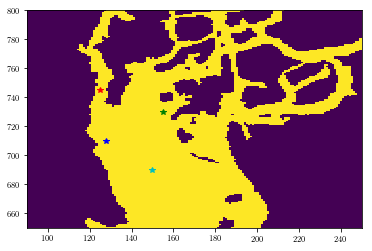

In [132]:
plt.pcolormesh(tmask[0,:,:])
plt.xlim(90,250)
plt.ylim(650,800)
plt.plot(125,745,'r*')
plt.plot(128,710,'b*')
plt.plot(155,730,'g*')
plt.plot(150,690,'c*')